## 第3章 : 代表的な次元削減を行う10本ノック

### ノック21 : PCA（主成分分析）を実施してみよう

#### アイリスデータの読み込み

In [109]:
import pandas as pd
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['target'] = iris.target

df.loc[df['target'] == 0, 'target_name'] = 'setosa'
df.loc[df['target'] == 1, 'target_name'] = 'versicolor'
df.loc[df['target'] == 2, 'target_name'] = 'virginica'

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#### 散布図行列の表示

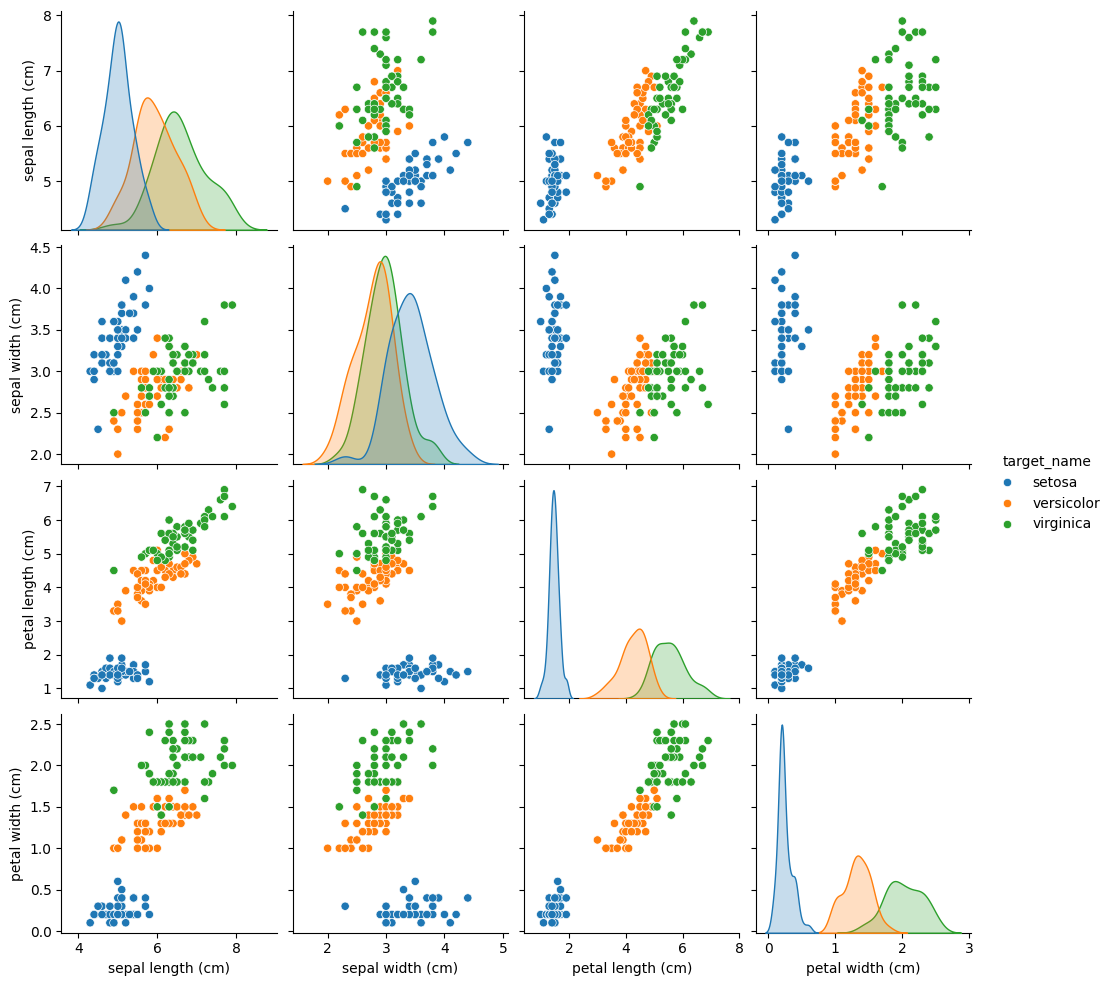

In [110]:
import seaborn as sns

sns.pairplot(df, vars=df.columns[:4], hue='target_name')

#### アイリスの3次元立体図

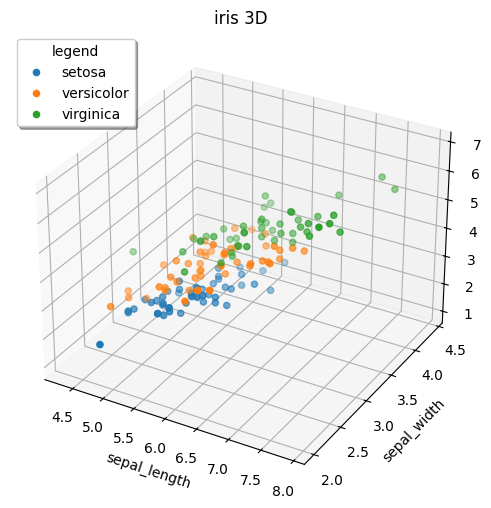

In [111]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for c in df['target_name'].unique():
    ax.scatter(
        df.iloc[:, 0][df['target_name'] == c],
        df.iloc[:, 1][df['target_name'] == c],
        df.iloc[:, 2][df['target_name'] == c],
        label=c
    )

ax.set_title('iris 3D')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length')
ax.legend(loc=2, title='legend', shadow=True)

plt.show()

#### PCA結果

In [112]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(random_state=0)

X_pc = pca.fit_transform(df.iloc[:, 0:4])

df_pca = pd.DataFrame(X_pc, columns=['PC{}'.format(i + 1) for i in range(len(X_pc[0]))])

print('主成分の数: ', pca.n_components_)
print('保たれている情報: ', np.sum(pca.explained_variance_ratio_))

display(df_pca.head())

主成分の数:  4
保たれている情報:  1.0


,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


#### PC1 と PC2 を可視化

<Axes: xlabel='PC1', ylabel='PC2'>

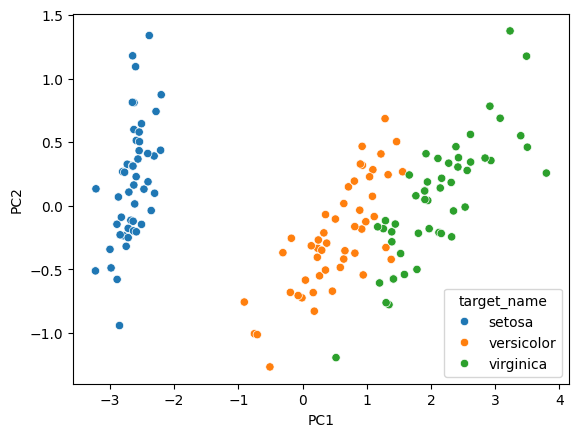

In [113]:
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue=df['target_name'])

### ノック22 : 主成分を解釈してみよう

#### 各主成分と元データの相関図

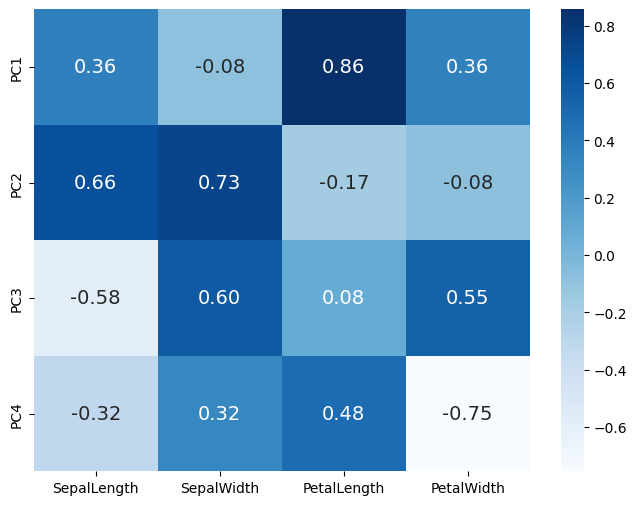

In [114]:
import seaborn as sns

fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)

sns.heatmap(
    pca.components_,
    cmap='Blues',
    annot=True,
    annot_kws={
        'size': 14,
    },
    fmt='.2f',
    xticklabels=[
        'SepalLength',
        'SepalWidth',
        'PetalLength',
        'PetalWidth',
    ],
    yticklabels=[
        'PC1',
        'PC2',
        'PC3',
        'PC4',
    ],
    ax=ax
)

plt.show()

### ノック23 : スクリープロットで次元削減数を探索してみよう

In [115]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.columns = [
    'class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthoyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline',
]

display(df_wine.shape)
display(df_wine)

(178, 14)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthoyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#### ワインデータの分布行列

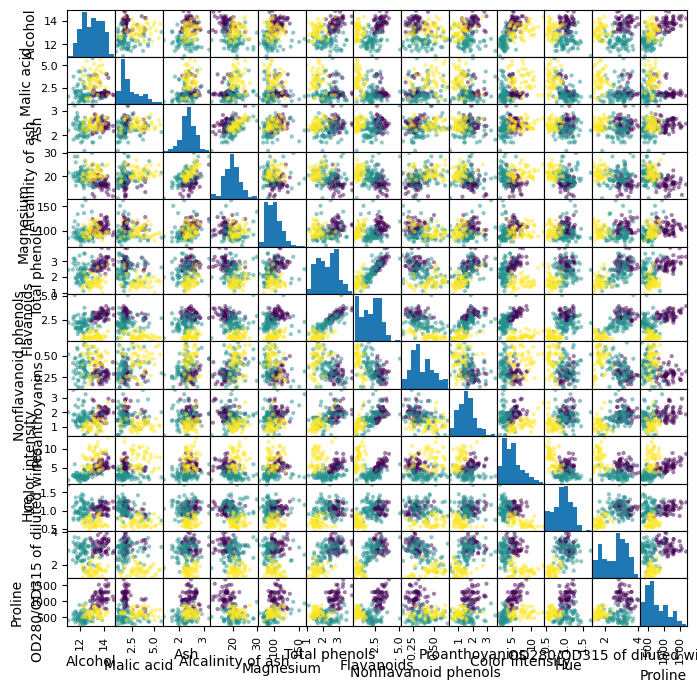

In [116]:
from pandas import plotting

plotting.scatter_matrix(df_wine.iloc[:, 1:], figsize=(8, 8), c=list(df_wine.iloc[:, 0]), alpha=0.5)
plt.show()

#### ワインデータのPCA結果

In [117]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np

sc = preprocessing.StandardScaler()

X = df_wine.iloc[:, 1:]
X_norm = sc.fit_transform(X)

pca = PCA(random_state=0)

X_pc = pca.fit_transform(X_norm)

df_pca = pd.DataFrame(X_pc, columns=['PC{}'.format(i + 1) for i in range(len(X_pc[0]))])

print('主成分の数: ', pca.n_components_)
print('保たれている情報: ', round(np.sum(pca.explained_variance_ratio_), 2))

df_pca.head()

主成分の数:  13
保たれている情報:  1.0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


#### 固有値の確認

In [118]:
pd.DataFrame(np.round(pca.explained_variance_, 2), index=['PC{}'.format(i + 1) for i in range(len(df_pca.columns))], columns=['固定値'])

,固定値
PC1,4.73
PC2,2.51
PC3,1.45
PC4,0.92
PC5,0.86
PC6,0.65
PC7,0.55
PC8,0.35
PC9,0.29
PC10,0.25


#### 固有値( explained_variance_ )のスクリープロット

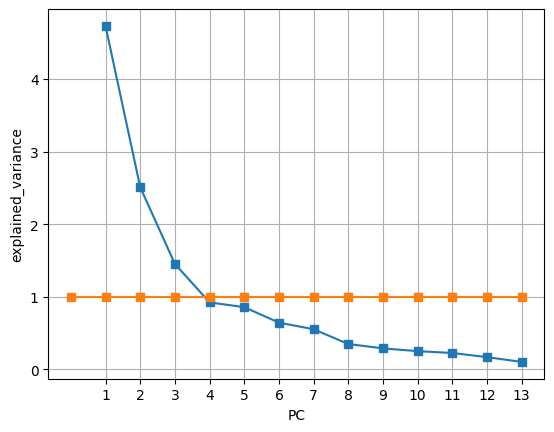

In [119]:
line = np.ones(14)

plt.plot(np.append(np.nan, pca.explained_variance_,), 's-')
plt.plot(line, 's-')

plt.xlabel('PC')
plt.ylabel('explained_variance')
plt.xticks(np.arange(1, 14, 1))

plt.grid()
plt.show()

### ノック24 : 寄与率で次元削減数を探索してみよう

#### 求めた固有値を元に有効なPC数を探索する

#### 寄与率

In [120]:
pd.DataFrame(np.round(pca.explained_variance_ratio_, 2), index=['PC{}'.format(i + 1) for i in range(len(df_pca.columns))], columns=['寄与率'])

,寄与率
PC1,0.36
PC2,0.19
PC3,0.11
PC4,0.07
PC5,0.07
PC6,0.05
PC7,0.04
PC8,0.03
PC9,0.02
PC10,0.02


#### 累積寄与率

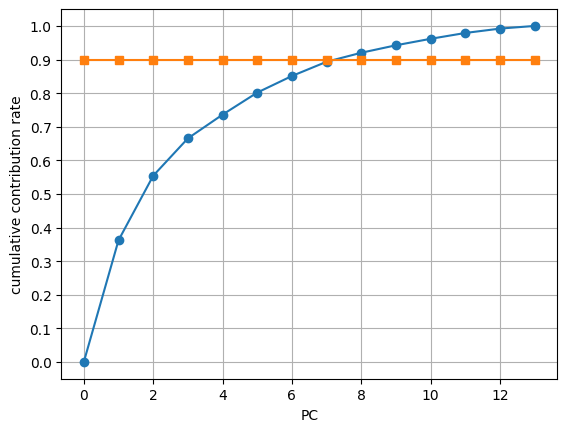

In [121]:
import matplotlib.ticker as ticker

line = np.full(14, 0.9)

plt.gca().get_xaxis().set_major_locator(
    ticker.MaxNLocator(integer=True)
)
plt.plot([0] + list(np.cumsum(pca.explained_variance_ratio_)), '-o')

plt.xlabel('PC')
plt.ylabel('cumulative contribution rate')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.plot(line, 's-')
plt.grid()

plt.show()

#### 累計寄与率を指定してPCAを実施

In [122]:
sc = preprocessing.StandardScaler()

X = df_wine.iloc[:, 1:]
X_norm = sc.fit_transform(X)

pca = PCA(n_components=0.9, random_state=0)

X_pc = pca.fit_transform(X_norm)

df_pca = pd.DataFrame(X_pc, columns=['PC{}'.format(i + 1) for i in range(len(X_pc[0]))])

print('主成分の数: ', pca.n_components_)
print('保たれている情報: ', round(np.sum(pca.explained_variance_ratio_), 2))

df_pca.head()

主成分の数:  8
保たれている情報:  0.92


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700


### ノック25 : Isomapで次元削減を実施してみよう

#### ムーンデータの読み込み

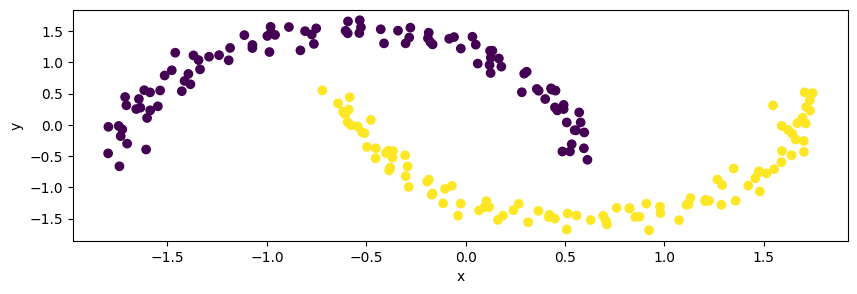

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, decomposition, manifold
from sklearn import datasets
from sklearn.decomposition import PCA

X, Y = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)

sc = preprocessing.StandardScaler()

X_norm = sc.fit_transform(X)

plt.figure(figsize=(10, 3))
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=Y)

plt.xlabel('x')
plt.ylabel('y')

plt.show()

#### Isomapの実行

In [133]:
pca = PCA(n_components=2)

X_reduced = pca.fit_transform(X_norm)

isomap_5 = manifold.Isomap(n_neighbors=5, n_components=2)
X_isomap_5 = isomap_5.fit_transform(X_norm)

isomap_10 = manifold.Isomap(n_neighbors=10, n_components=2)
X_isomap_10 = isomap_10.fit_transform(X_norm)


/Users/masarufukazawa/Library/Caches/pypoetry/virtualenvs/python-100knock-ai-model-XH4Gq-kL-py3.12/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/masarufukazawa/Library/Caches/pypoetry/virtualenvs/python-100knock-ai-model-XH4Gq-kL-py3.12/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/masarufukazawa/Library/Caches/pypoetry/virtualenvs/python-100knock-ai-model-XH4Gq-kL-py3.12/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/

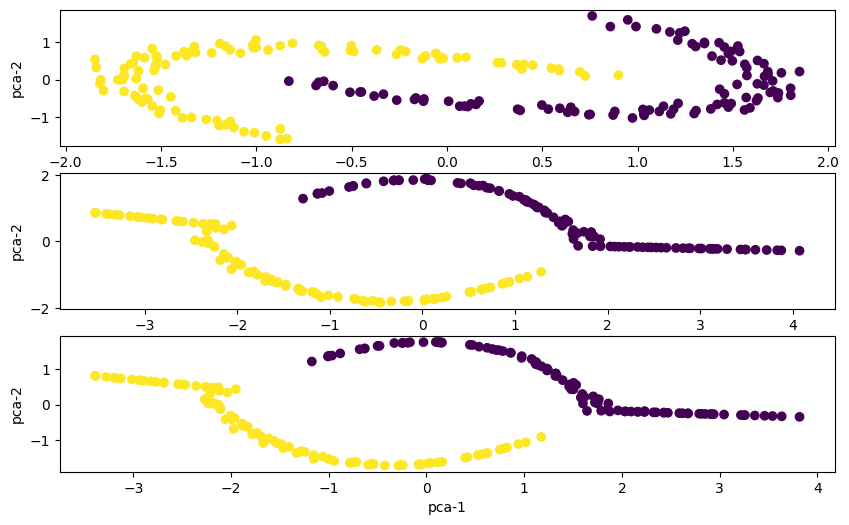

In [134]:
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y)
plt.xlabel('pca-1')
plt.ylabel('pca-2')

plt.subplot(3, 1, 2)
plt.scatter(X_isomap_5[:, 0], X_isomap_5[:, 1], c=Y)
plt.xlabel('pca-1')
plt.ylabel('pca-2')

plt.subplot(3, 1, 3)
plt.scatter(X_isomap_10[:, 0], X_isomap_10[:, 1], c=Y)
plt.xlabel('pca-1')
plt.ylabel('pca-2')

plt.show()

### ノック26 : t-SNEで次元削減を実施してみよう

#### MNISTの読み込み

In [136]:
from sklearn.datasets import load_digits

digits = load_digits()

display(digits.data.shape)
display(digits.data)

(1797, 64)

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

#### 64次元のデータを2次元に削減してみる

#### MNISTの画像表示

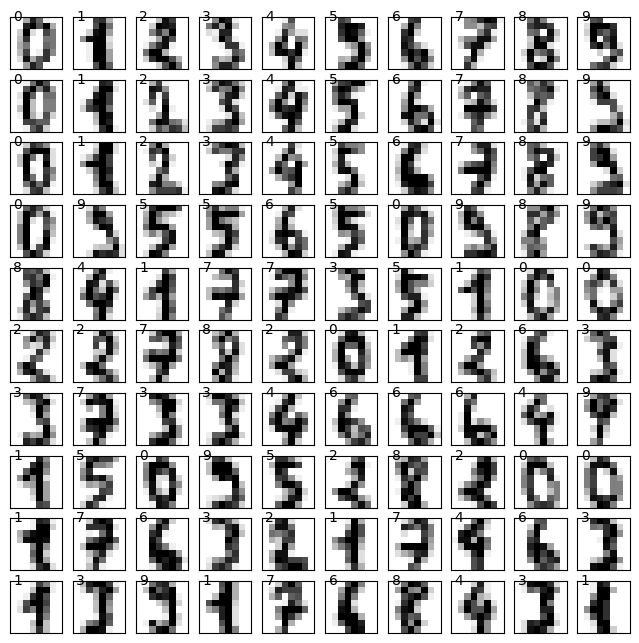

In [144]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks': [],})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0, 0, str(digits.target[i]))

#### PCAの結果
#### .. 非線形データに適応できていない

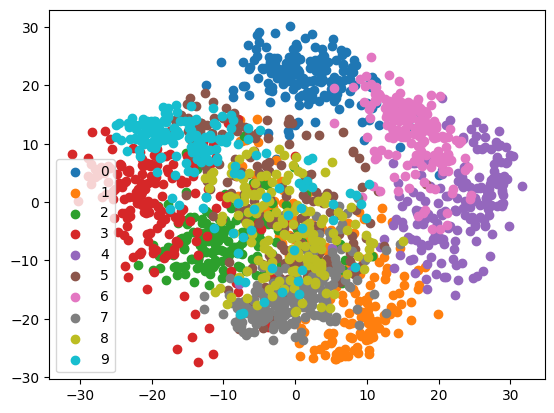

In [146]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components=2).fit_transform(digits.data)

for each_label in digits.target_names:
    c_plot_bool = digits.target == each_label
    plt.scatter(X_reduced[c_plot_bool, 0], X_reduced[c_plot_bool, 1], label="{}".format(each_label))
    plt.legend()

plt.show()

#### t-SNEの結果

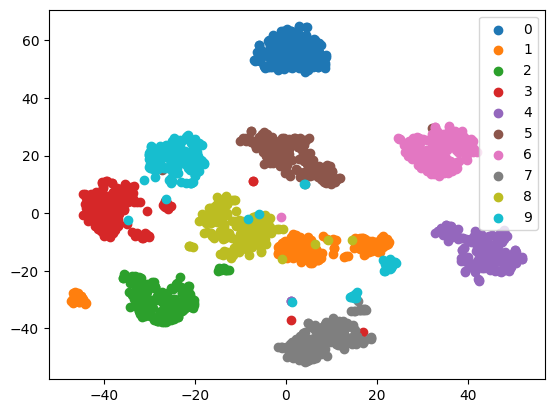

In [148]:
from sklearn.manifold import TSNE

X_reduced = TSNE(n_components=2, random_state=0).fit_transform(digits.data)

for each_label in digits.target_names:
    c_plot_bool = digits.target == each_label
    plt.scatter(X_reduced[c_plot_bool, 0], X_reduced[c_plot_bool, 1], label="{}".format(each_label))
    plt.legend()

plt.show()

### ノック27 : t-SNEで最適なPerplexityを探索してみよう

#### 最適なPerplexityを探索する関数（2次元表現）

In [155]:
import time

def create_2d_tsne(target_X, target_Y, y_labels, perplexity_list=[2, 5, 30, 50, 100]):

    fig, axes = plt.subplots(nrows=1, ncols=len(perplexity_list), figsize=(5 * len(perplexity_list), 4))

    for i, (ax, perplexity) in enumerate(zip(axes.flatten(), perplexity_list)):

        start_time = time.time()
        
        tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(target_X)

        for each_label in y_labels:

            c_plot_bool = digits.target == each_label
            ax.scatter(X_reduced[c_plot_bool, 0], X_reduced[c_plot_bool, 1], label="{}".format(each_label))
            ax.legend()

        end_time = time.time()
        ax.legend()
        ax.set_title('perplexity: {}'.format(perplexity))

        print('perplexity {} is {:.2f} seconds'.format(perplexity, end_time - start_time))


    plt.show()


#### t-SNEの結果（2次元）

perplexity 2 is 4.70 seconds
perplexity 5 is 4.47 seconds
perplexity 30 is 5.06 seconds
perplexity 50 is 5.28 seconds
perplexity 100 is 6.65 seconds


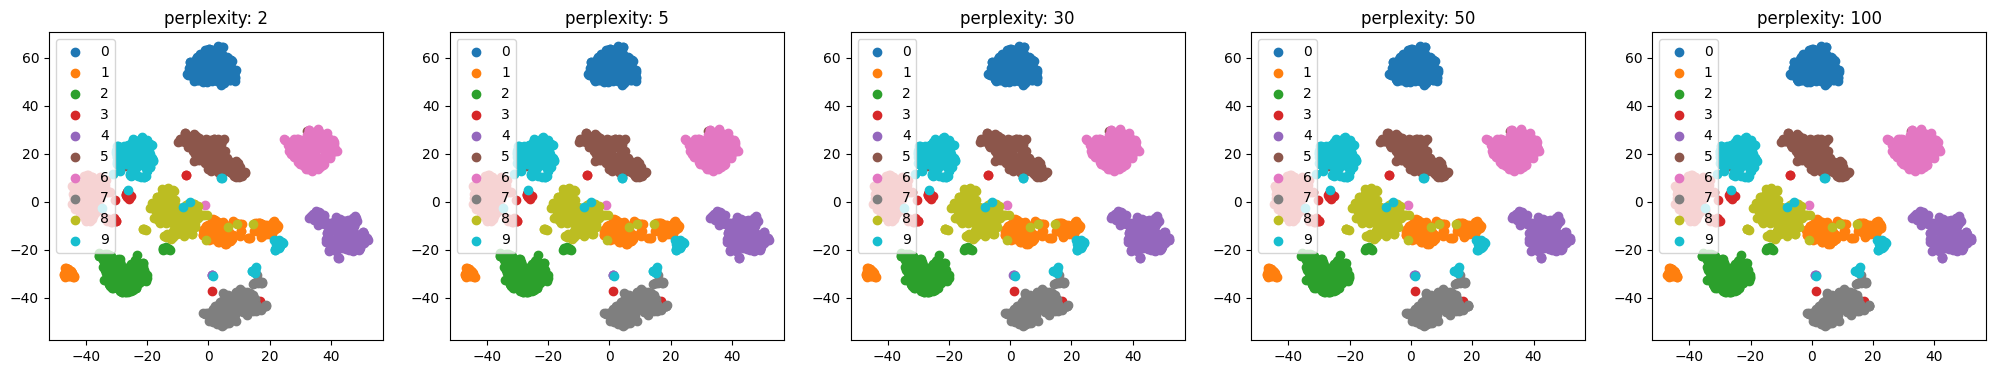

In [159]:
create_2d_tsne(digits.data, digits.target, digits.target_names)

#### 最適なPerplexityを探索する関数（3次元表現）

In [161]:
import time

def create_3d_tsne(target_X, target_Y, y_labels, perplexity_list=[2, 5, 30, 50, 100]):


    fig = plt.figure(figsize=(5 * len(perplexity_list), 4))

    for i, perplexity in enumerate(perplexity_list):

        ax = fig.add_subplot(1, len(perplexity_list), i+1, projection='3d')
        
        start_time = time.time()
        
        tsne = TSNE(n_components=3, random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(target_X)

        for each_label in y_labels:

            c_plot_bool = digits.target == each_label
            ax.scatter(X_reduced[c_plot_bool, 0], X_reduced[c_plot_bool, 1], label="{}".format(each_label))
            ax.legend()

        end_time = time.time()
        ax.legend()
        ax.set_title('perplexity: {}'.format(perplexity))

        print('perplexity {} is {:.2f} seconds'.format(perplexity, end_time - start_time))


    plt.show()


perplexity 2 is 6.51 seconds
perplexity 5 is 5.86 seconds
perplexity 30 is 6.80 seconds
perplexity 50 is 7.39 seconds
perplexity 100 is 10.16 seconds


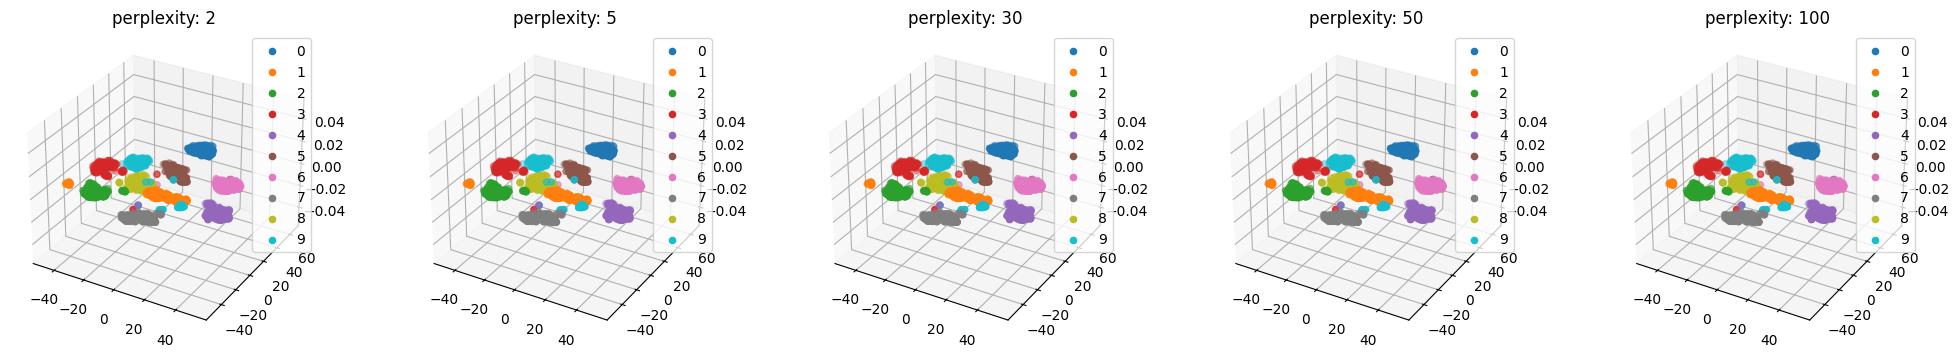

In [162]:
create_3d_tsne(digits.data, digits.target, digits.target_names)

### ノック28 : UMAPで次元削減を実施してみよう

#### UMAPとt-SNEを実行

In [169]:
import time
import umap

start_time_tsne = time.time()

X_reduced = TSNE(n_components=2, random_state=0).fit_transform(digits.data)

interval_tsne = time.time() - start_time_tsne

start_time_umap = time.time()

embedding = umap.UMAP(n_components=2, random_state=0).fit_transform(digits.data)

interval_umap = time.time() - start_time_umap

display('tsne : {}s'.format(np.round(interval_tsne, 2)))
display('umap : {}s'.format(np.round(interval_umap, 2)))

/Users/masarufukazawa/Library/Caches/pypoetry/virtualenvs/python-100knock-ai-model-XH4Gq-kL-py3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


'tsne : 4.81s'

'umap : 2.99s'

#### UMAPとt-SNEの結果

##### t-SNE

Text(0, 0.5, 'tsne-2')

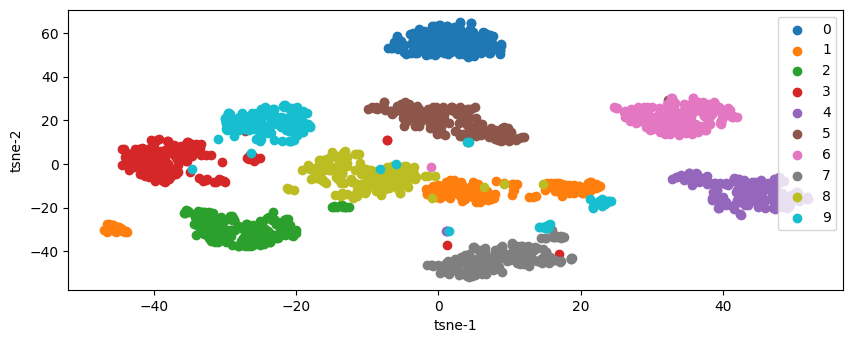

In [174]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)

for each_label in digits.target_names:
    c_plot_bool = digits.target == each_label
    plt.scatter(X_reduced[c_plot_bool, 0], X_reduced[c_plot_bool, 1], label="{}".format(each_label))

plt.legend(loc='upper right')
plt.xlabel('tsne-1')
plt.ylabel('tsne-2')

##### UMAP

Text(0, 0.5, 'tsne-2')

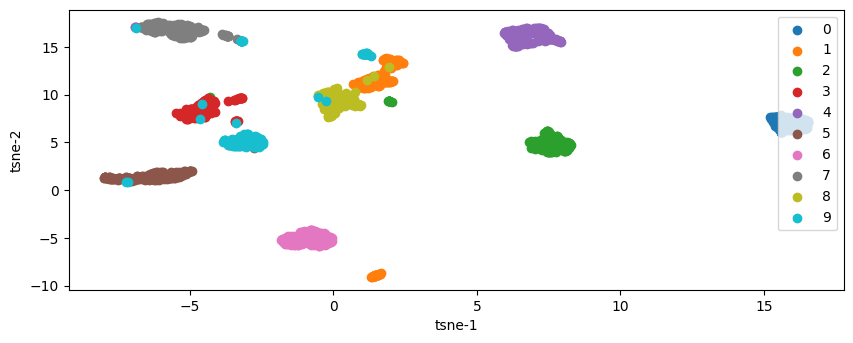

In [175]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)

for each_label in digits.target_names:
    c_plot_bool = digits.target == each_label
    plt.scatter(embedding[c_plot_bool, 0], embedding[c_plot_bool, 1], label="{}".format(each_label))

plt.legend(loc='upper right')
plt.xlabel('tsne-1')
plt.ylabel('tsne-2')

### ノック29 : UMAPで最適なn_neighborsを探索してみよう

In [183]:
import time

def create_2d_umap(target_X, target_Y, y_labels, n_neighbors_list=[2, 5, 30, 50, 100]):

    fig, axes = plt.subplots(
        nrows=1,
        ncols=len(n_neighbors_list),
        figsize=(5 * len(n_neighbors_list), 4)
    )

    for i, (ax, n_neighbors) in enumerate(zip(axes.flatten(), n_neighbors_list)):

        start_time = time.time()
        
        mapper = umap.UMAP(n_components=2, random_state=0, n_neighbors=n_neighbors)

        Y = mapper.fit_transform(target_X)

        for each_label in y_labels:

            c_plot_bool = digits.target == each_label
            ax.scatter(X_reduced[c_plot_bool, 0], X_reduced[c_plot_bool, 1], label="{}".format(each_label))

        end_time = time.time()
        ax.legend('upper right')
        ax.set_title('n_neighbors: {}'.format(n_neighbors))

        print('n_neighbors {} is {:.2f} seconds'.format(n_neighbors, end_time - start_time))

    plt.show()

/Users/masarufukazawa/Library/Caches/pypoetry/virtualenvs/python-100knock-ai-model-XH4Gq-kL-py3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/masarufukazawa/Library/Caches/pypoetry/virtualenvs/python-100knock-ai-model-XH4Gq-kL-py3.12/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/masarufukazawa/Library/Caches/pypoetry/virtualenvs/python-100knock-ai-model-XH4Gq-kL-py3.12/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:427: UserWarning: Exited at iteration 63 with accuracies 
[6.91484936e-06 4.83384762e-06 3.13918073e-05 6.28719451e-05]
not reaching the requested tolerance 5.97536563873291e-06.
Use iteration 63 inst

n_neighbors 2 is 5.62 seconds


/Users/masarufukazawa/Library/Caches/pypoetry/virtualenvs/python-100knock-ai-model-XH4Gq-kL-py3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


n_neighbors 5 is 2.27 seconds


/Users/masarufukazawa/Library/Caches/pypoetry/virtualenvs/python-100knock-ai-model-XH4Gq-kL-py3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


n_neighbors 30 is 3.73 seconds


/Users/masarufukazawa/Library/Caches/pypoetry/virtualenvs/python-100knock-ai-model-XH4Gq-kL-py3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


n_neighbors 50 is 3.75 seconds


/Users/masarufukazawa/Library/Caches/pypoetry/virtualenvs/python-100knock-ai-model-XH4Gq-kL-py3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


n_neighbors 100 is 4.23 seconds


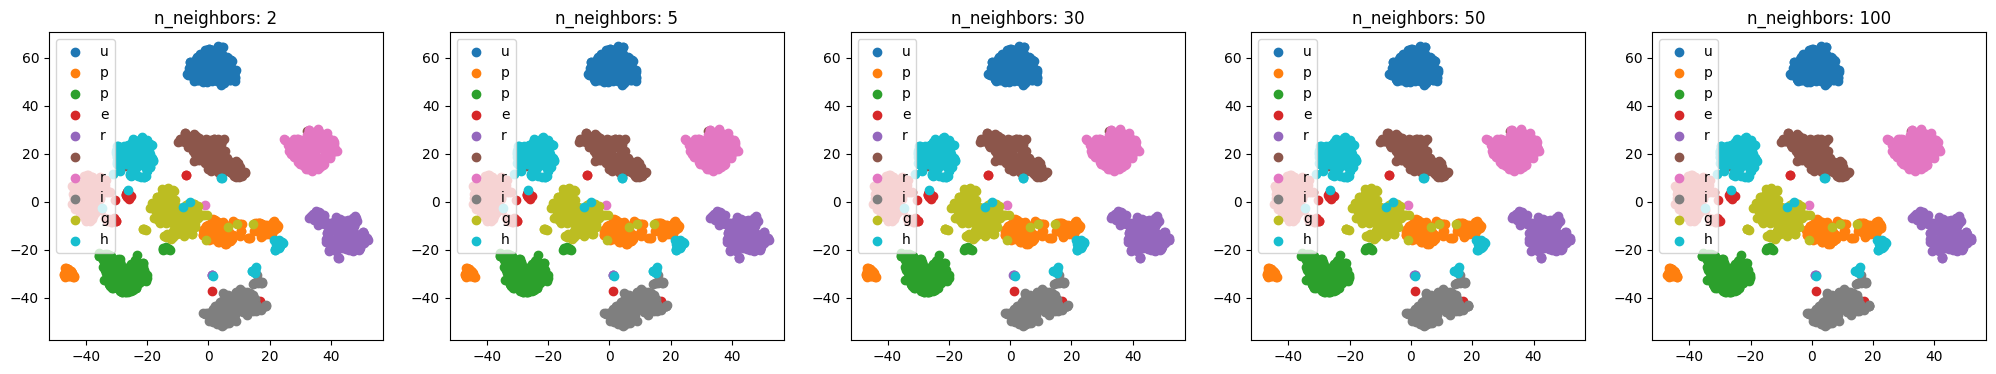

In [184]:
create_2d_umap(digits.data, digits.target, digits.target_names)

### ノック30 : PCAとUMAPを組み合わせて次元削減を実施してみよう